<a href="https://colab.research.google.com/github/PablooRocha03/BigData03-pyspark-analise/blob/main/at03_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big data - Dataset - 2,3 milhões de incêndios florestais nos EUA (1992-2020)

 O conjunto de dados de incêndios florestais dos Estados Unidos de 1992 a 2020 é uma fonte valiosa de informações que suporta a análise, prevenção e resposta a incêndios florestais. Composto por 2,3 milhões de registros georreferenciados, representando mais de 28 anos de ocorrências, o conjunto inclui dados essenciais, como data de descoberta, tamanho final do incêndio e localização precisa. Esses dados são cruciais para identificar padrões temporais e espaciais, áreas de risco e tendências ao longo do tempo. Em resumo, esse conjunto de dados oferece insights valiosos para pesquisadores, gestores de recursos naturais e formuladores de políticas, contribuindo para a compreensão e mitigação dos incêndios florestais nos Estados Unidos.



**Equipes**


1.   Pablo Rocha
2.   Wanessa Nicolly

1.   Maria Clara
2.   João Victor

1.   João Pedro
2.   Luiz Filipe




**Configuração e Leitura de Dados com PySpark:**

Primeiro, instale o PySpark (`!pip install pyspark`). Em seguida, importe bibliotecas como `gdown`, `pandas`, `seaborn`, e `matplotlib.pyplot` para manipular e visualizar dados. Utilize `gdown` para baixar um arquivo CSV diretamente do Google Drive. Inicie uma sessão Spark (`SparkSession.builder.appName('amz-fire').getOrCreate()`) para processamento distribuído. Leia o arquivo CSV baixado em um DataFrame do Spark (`spark.read.csv(output, header=True, inferSchema=True)`) para análise detalhada dos dados.

In [ ]:
!pip install pyspark

import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# URL do Google Drive (modificado para link de download direto)
url = 'https://drive.google.com/uc?id=1ZyMdcQQXkJgFkEP9hHKDSGZGSfJXs-z6'

# Baixando o arquivo
output = 'file2.csv'
gdown.download(url, output, quiet=False)

# Inicializando o SparkSession
spark = SparkSession.builder.appName('amz-fire').getOrCreate()

# Lendo o arquivo CSV baixado
df = spark.read.csv(output, header=True, inferSchema=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a23d3e2e12b8a984bd93817618e8d19356d5dfd82eb199ad4e55f32d2254f513
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Downloading...
From (original): https://drive.google.com/uc?id=1ZyMdcQQXkJgFkEP9hHKDSGZGSfJXs-z6
From (redirected): https://drive.google.com/uc?id=1ZyMdcQQXkJgFkEP9hHKDSGZGSfJXs-z6&confirm=t&uuid=53e5e583-efed-4107-b08c-32aaf9ec9591
To: /content/file2.csv
100%|██████████| 1.07G/1.07G [00:28<00:00, 36.9MB/s]


**Exibição do Schema em PySpark:**

Para exibir o esquema de um DataFrame no PySpark, utilize `df.printSchema()`. Este método imprime a estrutura de colunas (nomes e tipos de dados) do DataFrame `df`, facilitando a compreensão da organização dos dados carregados ou criados no ambiente Spark.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession

# Inicializar uma sessão do Spark
spark = SparkSession.builder.appName("ExemploPySpark").getOrCreate()


# Exibir o schema
df.printSchema()


root
 |-- OBJECTID: integer (nullable = true)
 |-- Shape: string (nullable = true)
 |-- FOD_ID: string (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_PLUS_INCIDENT_JOIN_ID: string (nullable = true)
 |-- ICS_209_PLUS_COMPLEX_JOIN_ID: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: string (nullable = true


# Análise Exploratória e Limpeza de Dados do Dataset de Incêndios na Califórnia (1992-2020)

A análise exploratória e a limpeza de dados são etapas fundamentais no processo de ciência de dados. Elas garantem que os dados utilizados em análises subsequentes sejam de alta qualidade e forneçam insights precisos e confiáveis. Este documento descreve o processo de análise exploratória e limpeza aplicado a um dataset de incêndios na Califórnia, abrangendo o período de 1992 a 2020.

In [ ]:
# Mostrar as primeiras linhas
df.show(5)

+--------+--------------------+------+----------+------------------+-------------+---------------------+----------------------+------------------------+---------------------+--------------------------+--------------------+-----------------+---------+---------+-----------------------------+----------------------------+-------+--------------+------------+---------+--------------+-------------+--------------+-------------------------+--------------------+-----------------------+---------+--------+---------+---------+---------------+-----------+-------------+----------------+-----+------+---------+----------------+
|OBJECTID|               Shape|FOD_ID|    FPA_ID|SOURCE_SYSTEM_TYPE|SOURCE_SYSTEM|NWCG_REPORTING_AGENCY|NWCG_REPORTING_UNIT_ID|NWCG_REPORTING_UNIT_NAME|SOURCE_REPORTING_UNIT|SOURCE_REPORTING_UNIT_NAME|LOCAL_FIRE_REPORT_ID|LOCAL_INCIDENT_ID|FIRE_CODE|FIRE_NAME|ICS_209_PLUS_INCIDENT_JOIN_ID|ICS_209_PLUS_COMPLEX_JOIN_ID|MTBS_ID|MTBS_FIRE_NAME|COMPLEX_NAME|FIRE_YEAR|DISCOVERY_DATE|D

In [ ]:
from pyspark.sql.functions import col, count, isnan, when
import pandas as pd

In [ ]:
duplicados = df.count() - df.dropDuplicates().count()

print(f"Total de registros duplicados: {duplicados}")

Total de registros duplicados: 0


In [ ]:
df.dtypes

[('OBJECTID', 'int'),
 ('Shape', 'string'),
 ('FOD_ID', 'string'),
 ('FPA_ID', 'string'),
 ('SOURCE_SYSTEM_TYPE', 'string'),
 ('SOURCE_SYSTEM', 'string'),
 ('NWCG_REPORTING_AGENCY', 'string'),
 ('NWCG_REPORTING_UNIT_ID', 'string'),
 ('NWCG_REPORTING_UNIT_NAME', 'string'),
 ('SOURCE_REPORTING_UNIT', 'string'),
 ('SOURCE_REPORTING_UNIT_NAME', 'string'),
 ('LOCAL_FIRE_REPORT_ID', 'string'),
 ('LOCAL_INCIDENT_ID', 'string'),
 ('FIRE_CODE', 'string'),
 ('FIRE_NAME', 'string'),
 ('ICS_209_PLUS_INCIDENT_JOIN_ID', 'string'),
 ('ICS_209_PLUS_COMPLEX_JOIN_ID', 'string'),
 ('MTBS_ID', 'string'),
 ('MTBS_FIRE_NAME', 'string'),
 ('COMPLEX_NAME', 'string'),
 ('FIRE_YEAR', 'string'),
 ('DISCOVERY_DATE', 'string'),
 ('DISCOVERY_DOY', 'string'),
 ('DISCOVERY_TIME', 'string'),
 ('NWCG_CAUSE_CLASSIFICATION', 'string'),
 ('NWCG_GENERAL_CAUSE', 'string'),
 ('NWCG_CAUSE_AGE_CATEGORY', 'string'),
 ('CONT_DATE', 'string'),
 ('CONT_DOY', 'string'),
 ('CONT_TIME', 'string'),
 ('FIRE_SIZE', 'string'),
 ('FIRE_SI

In [ ]:
# Listas para armazenar os nomes das colunas numéricas e não numéricas
colunas_numericas = []
colunas_nao_numericas = []

# Iterar pelos tipos de dados das colunas
for coluna, tipo in df.dtypes:
    if tipo in ['int', 'double', 'float']:
        colunas_numericas.append(coluna)
    else:
        colunas_nao_numericas.append(coluna)

print("Colunas Numéricas:", colunas_numericas)
print("Colunas Não Numéricas:", colunas_nao_numericas)


Colunas Numéricas: ['OBJECTID']
Colunas Não Numéricas: ['Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME']


In [ ]:
# Criar dataframes separados para variáveis numéricas e não numéricas
df_numerico = df.select(colunas_numericas)
df_nao_numerico = df.select(colunas_nao_numericas)

# Mostrar os schemas dos novos dataframes
df_numerico.printSchema()
df_nao_numerico.printSchema()

# Mostrar as primeiras linhas dos novos dataframes
df_numerico.show(5)
df_nao_numerico.show(5)


root
 |-- OBJECTID: integer (nullable = true)

root
 |-- Shape: string (nullable = true)
 |-- FOD_ID: string (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- SOURCE_SYSTEM_TYPE: string (nullable = true)
 |-- SOURCE_SYSTEM: string (nullable = true)
 |-- NWCG_REPORTING_AGENCY: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_ID: string (nullable = true)
 |-- NWCG_REPORTING_UNIT_NAME: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT: string (nullable = true)
 |-- SOURCE_REPORTING_UNIT_NAME: string (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- ICS_209_PLUS_INCIDENT_JOIN_ID: string (nullable = true)
 |-- ICS_209_PLUS_COMPLEX_JOIN_ID: string (nullable = true)
 |-- MTBS_ID: string (nullable = true)
 |-- MTBS_FIRE_NAME: string (nullable = true)
 |-- COMPLEX_NAME: string (nullable = true)
 |-- FIRE_YEAR: string (nullable 


# Análise de Incêndios de Causa Natural por Estado nos EUA
O código apresentado tem como objetivo analisar e identificar os estados mais afetados por incêndios de causa natural nos Estados Unidos.

In [ ]:
from pyspark.sql.functions import col

# Filtrar incêndios de causa natural (NWCG_CAUSE_CLASSIFICATION = "Natural")
natural_fires = df.filter(df["NWCG_CAUSE_CLASSIFICATION"] == "Natural")

# Contar o número de incêndios de causa natural por estado
fires_by_state = natural_fires.groupBy("STATE").count().orderBy("count", ascending=False)

# Mostrar os resultados
print("Número de incêndios de causa natural por estado:")
fires_by_state.show()

Número de incêndios de causa natural por estado:
+-----+-----+
|STATE|count|
+-----+-----+
|   OR|33547|
|   AZ|30531|
|   CA|28730|
|   ID|24589|
|   FL|23031|
|   CO|22519|
|   MT|20360|
|   NM|19456|
|   UT|19354|
|   NV|11990|
|   WA|10180|
|   GA| 9065|
|   TX| 8034|
|   WY| 7581|
|   NY| 7033|
|   SD| 6316|
|   AK| 4802|
|   LA| 2827|
|   NC| 2273|
|   SC| 2080|
+-----+-----+
only showing top 20 rows



#Escolha do Estado para Análise Profunda
O estado escolhido para a análise profunda foi a Califórnia. Vamos investigar o quão afetada a Califórnia foi pelos incêndios de causa natural. Para isso, realizaremos uma série de passos para entender melhor a distribuição dos incêndios ao longo do tempo e outras características relevantes.

In [ ]:
# Exemplo: Filtrar incêndios de causa natural na Califórnia (estado = "CA")
california_fires = natural_fires.filter(col("STATE") == "CA")

# Contar o número de incêndios de causa natural na Califórnia
num_california_fires = california_fires.count()
print(f"Número de incêndios de causa natural na Califórnia: {num_california_fires}")

Número de incêndios de causa natural na Califórnia: 28730


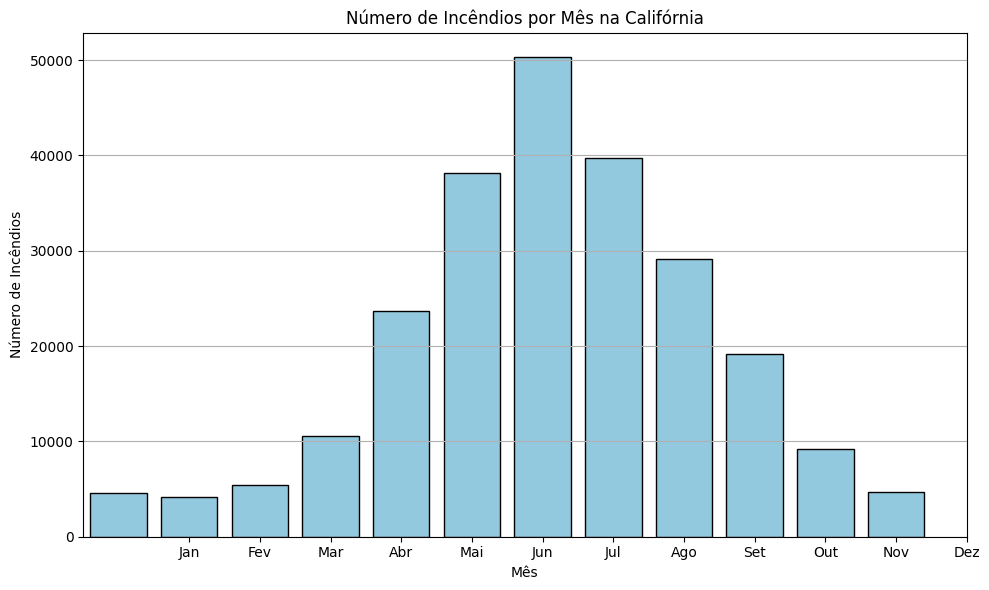

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter o DataFrame do PySpark para Pandas
df_california_pd = df_california.toPandas()

# Remover duplicatas
df_california_pd.drop_duplicates(inplace=True)

# Verificar e tratar valores nulos na coluna DISCOVERY_DATE
df_california_pd['DISCOVERY_DATE'] = pd.to_datetime(df_california_pd['DISCOVERY_DATE'], errors='coerce')
df_california_pd.dropna(subset=['DISCOVERY_DATE'], inplace=True)

# Extrair o mês da coluna DISCOVERY_DATE
df_california_pd['MES'] = df_california_pd['DISCOVERY_DATE'].dt.month

# Contar o número de incêndios por mês
incendios_por_mes = df_california_pd['MES'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=incendios_por_mes.index, y=incendios_por_mes.values, color='skyblue', edgecolor='black')
plt.title('Número de Incêndios por Mês na Califórnia')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


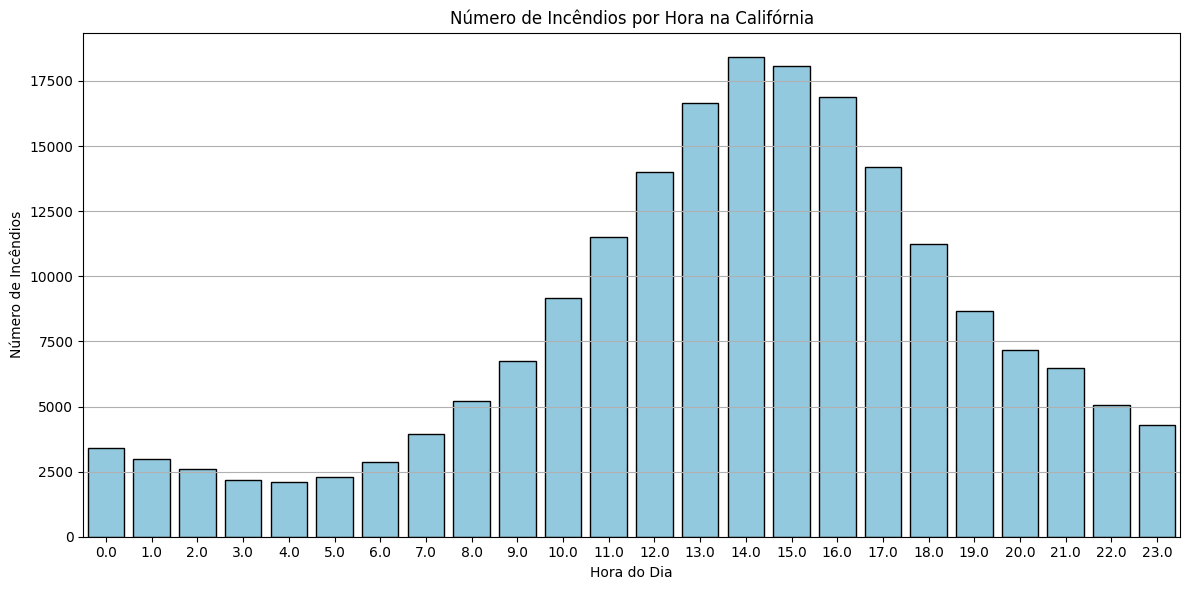

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter o DataFrame do PySpark para Pandas
df_california_pd = df_california.toPandas()

# Extrair a hora da coluna DISCOVERY_TIME, assumindo que seja um formato de string hhmm
df_california_pd['HORA'] = pd.to_numeric(df_california_pd['DISCOVERY_TIME'], errors='coerce') // 100

# Filtrar as horas válidas (entre 0 e 23)
df_california_pd = df_california_pd[df_california_pd['HORA'].between(0, 23)]

# Contar o número de incêndios por hora
incendios_por_hora = df_california_pd['HORA'].value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=incendios_por_hora.index, y=incendios_por_hora.values, color='skyblue', edgecolor='black')
plt.title('Número de Incêndios por Hora na Califórnia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Incêndios')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Análise Temporal dos Incêndios na Califórnia
  A análise temporal dos incêndios é crucial para entender os padrões sazonais e anuais, auxiliando na tomada de decisões estratégicas para prevenção e mitigação de incêndios. Identificar os meses e anos com maior incidência de incêndios pode orientar políticas públicas, alocação de recursos e medidas preventivas, contribuindo para a redução dos impactos dos incêndios na Califórnia.

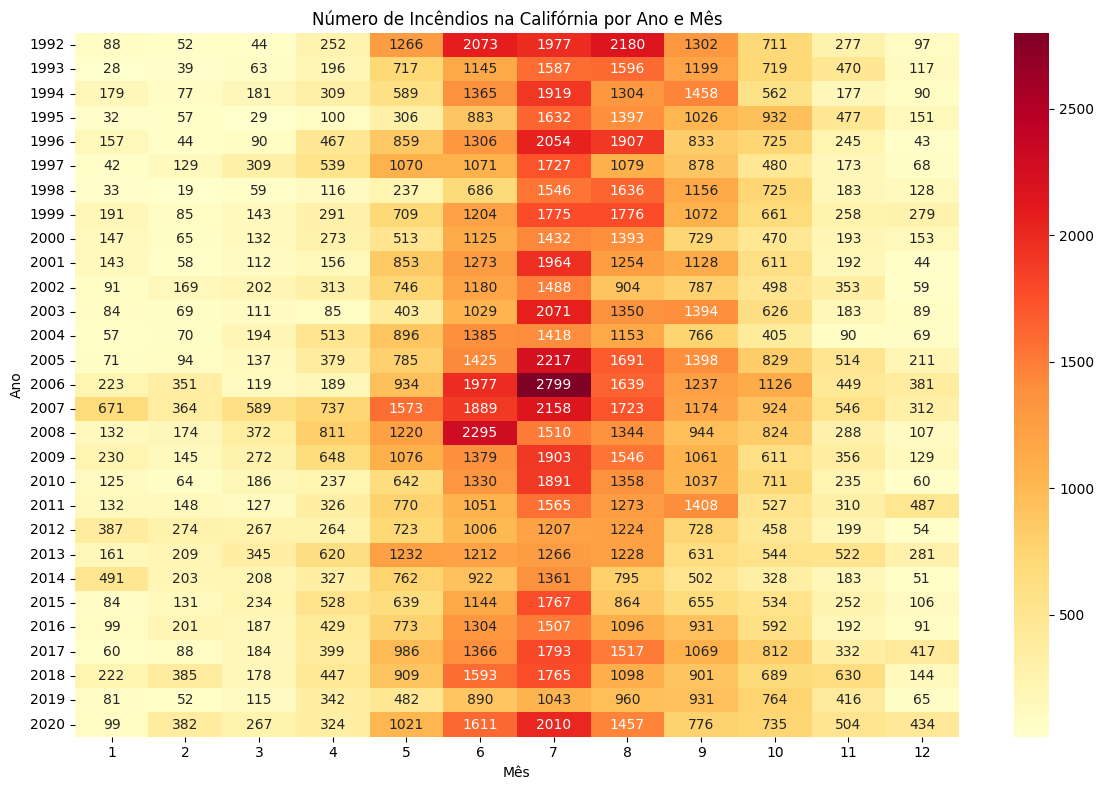

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Primeiro, converter o DataFrame para Pandas
df_california_pd = df_california.toPandas()

# Extrair ano e mês da data de descoberta
df_california_pd['DISCOVERY_YEAR'] = pd.to_datetime(df_california_pd['DISCOVERY_DATE']).dt.year
df_california_pd['DISCOVERY_MONTH'] = pd.to_datetime(df_california_pd['DISCOVERY_DATE']).dt.month

# Contar o número de incêndios por ano e mês
incendios_por_ano_mes = df_california_pd.groupby(['DISCOVERY_YEAR', 'DISCOVERY_MONTH']).size().unstack(fill_value=0)

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(incendios_por_ano_mes, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Número de Incêndios na Califórnia por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.tight_layout()
plt.show()


# Identificação das Causas Principais
A análise da distribuição das causas dos incêndios é crucial para identificar as razões mais comuns para a ocorrência de incêndios. Saber quais causas são mais frequentes nos permite direcionar esforços e recursos de maneira mais eficaz.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a frequência de cada causa de incêndio
causas_incendios = df_california_pd['NWCG_GENERAL_CAUSE'].value_counts()

# Converter para DataFrame
causas_incendios_df = causas_incendios.reset_index()
causas_incendios_df.columns = ['Causa', 'Contagem']


In [ ]:
# Identificar a maior causa de incêndios
maior_causa = causas_incendios_df.iloc[0]
print(f"A maior causa de incêndios é {maior_causa['Causa']} com {maior_causa['Contagem']} ocorrências.")


A maior causa de incêndios é Missing data/not specified/undetermined com 90261 ocorrências.


<ipython-input-36-f18045882331>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Causa', y='Contagem', data=causas_incendios_df, palette='viridis')


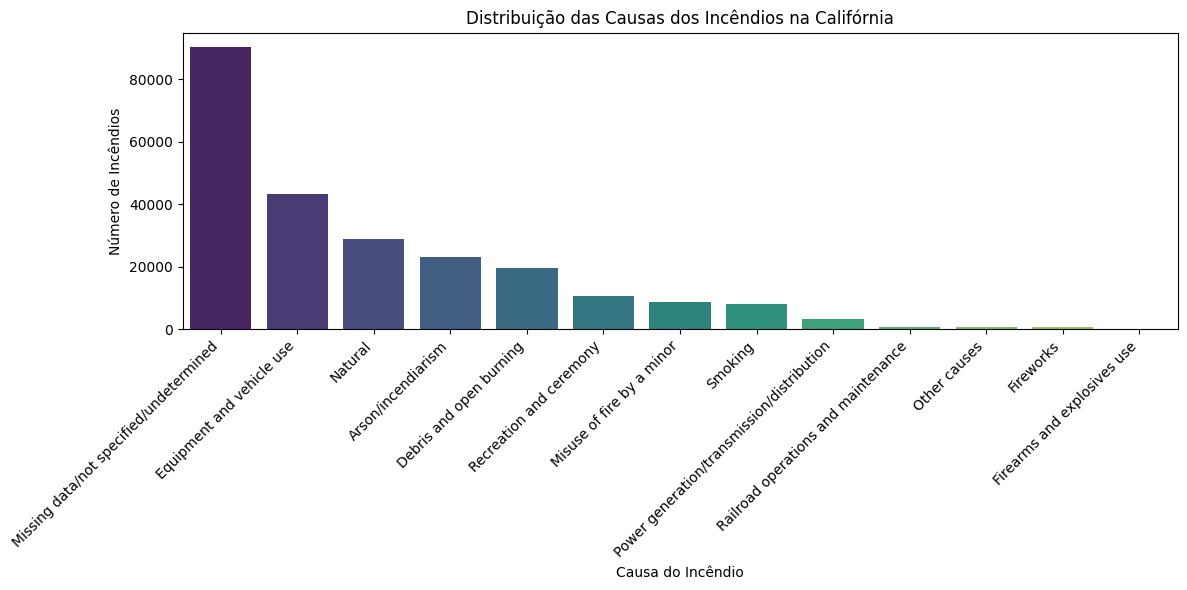

In [ ]:
# Plotar a distribuição das causas dos incêndios
plt.figure(figsize=(12, 6))
sns.barplot(x='Causa', y='Contagem', data=causas_incendios_df, palette='viridis')
plt.title('Distribuição das Causas dos Incêndios na Califórnia')
plt.xlabel('Causa do Incêndio')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Importância da Análise da Área Afetada por Incêndios na Califórnia
Este código realiza uma análise importante sobre a área total afetada por incêndios na Califórnia. Ele calcula a proporção da área afetada em relação à área total do estado e estima quantos anos seriam necessários para que toda a Califórnia fosse afetada, considerando os dados disponíveis.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Inicializar uma sessão do Spark
spark = SparkSession.builder.appName("CalifórniaFire").getOrCreate()

# Calcular a área total afetada por incêndios
area_afetada_total_acres = df_california.groupBy().agg(F.sum('FIRE_SIZE').alias('AREA_AFETADA')).collect()[0]['AREA_AFETADA']
area_afetada_total_km2 = area_afetada_total_acres * 0.00404686  # 1 acre = 0.00404686 km²

# Área total da Califórnia em km²
area_california_km2 = 423970  # A área total da Califórnia em km²

# Calcular a proporção da área afetada em relação à área total da Califórnia
proporcao_area_afetada = area_afetada_total_km2 / area_california_km2

# Estimar o número de anos necessários para afetar toda a Califórnia
anos_estimados = area_california_km2 / area_afetada_total_km2

print(f"A área total afetada por incêndios até o momento representa {proporcao_area_afetada:.2%} da área total da Califórnia.")
print(f"Estima-se que levaria aproximadamente {anos_estimados:.1f} anos para que toda a área da Califórnia fosse afetada por incêndios, considerando os dados disponíveis.")


A área total afetada por incêndios até o momento representa 19.00% da área total da Califórnia.
Estima-se que levaria aproximadamente 5.3 anos para que toda a área da Califórnia fosse afetada por incêndios, considerando os dados disponíveis.



# Fechamento da Análise dos Incêndios na Califórnia (1992-2020)
Neste fechamento, apresentamos uma análise final do número total de incêndios ocorridos na Califórnia no período de 1992 a 2020.

In [ ]:
# Converter o DataFrame do PySpark para Pandas
df_california_pd = df_california.toPandas()

# Remover duplicatas
df_california_pd.drop_duplicates(inplace=True)

# Verificar e tratar valores nulos na coluna DISCOVERY_DATE
df_california_pd['DISCOVERY_DATE'] = pd.to_datetime(df_california_pd['DISCOVERY_DATE'], errors='coerce')
df_california_pd.dropna(subset=['DISCOVERY_DATE'], inplace=True)

# Contar o número total de incêndios
numero_total_incendios = df_california_pd.shape[0]

print(f"Número total de incêndios na Califórnia de 1992 a 2020: {numero_total_incendios}")


Número total de incêndios na Califórnia de 1992 a 2020: 238875
